In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


C:\Users\gauta\AppData\Local\Temp\ipykernel_23572\4245898435.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv(r"C:\Users\gauta\Downloads\archive (6)\train.csv",encoding='unicode escape')

In [5]:
data


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [6]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
data.shape

(54808, 14)

In [8]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
data.drop(['employee_id'],axis=1,inplace=True)

In [10]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')


                                                 **HANDLING MISSING VALUES**
                                                 

In [11]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
data['education'].head(10)

0    Master's & above
1          Bachelor's
2          Bachelor's
3          Bachelor's
4          Bachelor's
5          Bachelor's
6          Bachelor's
7    Master's & above
8          Bachelor's
9    Master's & above
Name: education, dtype: object

In [13]:
data['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [14]:
data['education'].fillna(data['education'].mode(),inplace=True)

C:\Users\gauta\AppData\Local\Temp\ipykernel_23572\4094045500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].fillna(data['education'].mode(),inplace=True)


In [15]:
data['education'].isnull().sum()

2409

In [16]:
data['previous_year_rating'].mode()

0    3.0
Name: previous_year_rating, dtype: float64

In [17]:
data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0],inplace=True)

C:\Users\gauta\AppData\Local\Temp\ipykernel_23572\882162471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0],inplace=True)


In [18]:
data['previous_year_rating'].isnull().sum()

0

 **EXPLORATORY DATA ANALYSIS**


                                                            **SUM AND DISTRIBUTION OF PROMOTION**

In [19]:
data['is_promoted'].sum()

4668

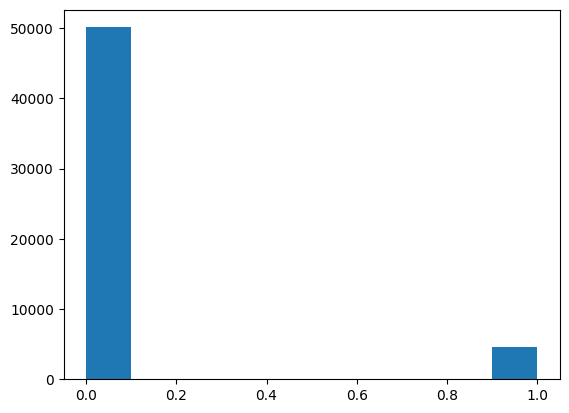

In [20]:
plt.hist(data['is_promoted'])
plt.show()



                                                          **ON THE BASIS OF department**
                                                   

In [21]:
data['department']

0        Sales & Marketing
1               Operations
2        Sales & Marketing
3        Sales & Marketing
4               Technology
               ...        
54803           Technology
54804           Operations
54805            Analytics
54806    Sales & Marketing
54807                   HR
Name: department, Length: 54808, dtype: object

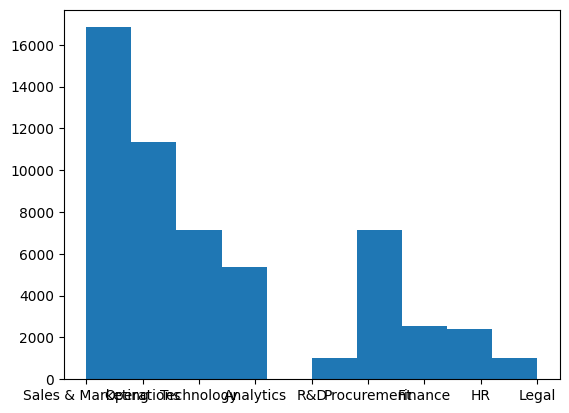

In [22]:
plt.hist(data['department'])
plt.show()

In [23]:
data.groupby(['department'])['is_promoted'].sum()

department
Analytics             512
Finance               206
HR                    136
Legal                  53
Operations           1023
Procurement           688
R&D                    69
Sales & Marketing    1213
Technology            768
Name: is_promoted, dtype: int64

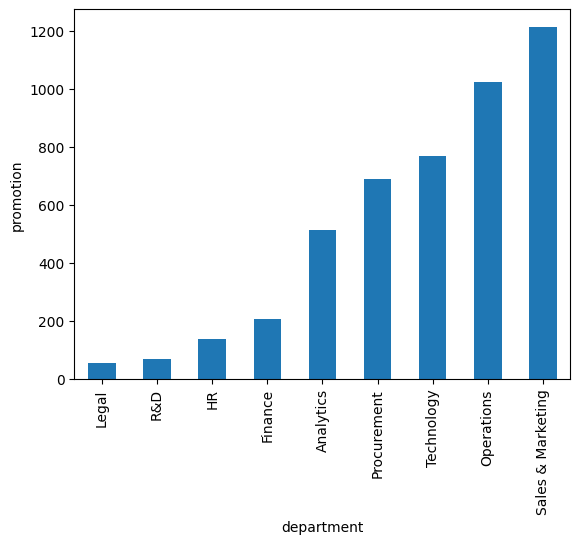

In [24]:
data.groupby(['department'])['is_promoted'].sum().sort_values().plot(kind='bar')
plt.xlabel('department')
plt.ylabel('promotion')
plt.show()

In [25]:
data['dep_rate']= 100*data['is_promoted']/data['department'].count()

In [26]:
data['is_promoted'].sum()

4668

In [27]:
data['is_promoted'].count()

54808

In [28]:
num=data.groupby(['department'])['is_promoted'].sum().reset_index()
denom= data.groupby(['department'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
num

,department,is_promoted_sum
0,Analytics,512
1,Finance,206
2,HR,136
3,Legal,53
4,Operations,1023
5,Procurement,688
6,R&D,69
7,Sales & Marketing,1213
8,Technology,768


# 

In [29]:
denom

,department,is_promoted_count
0,Analytics,5352
1,Finance,2536
2,HR,2418
3,Legal,1039
4,Operations,11348
5,Procurement,7138
6,R&D,999
7,Sales & Marketing,16840
8,Technology,7138


In [30]:
merge_df= pd.merge(left=num,right=denom,left_on='department',right_on='department',how='inner')
merge_df

,department,is_promoted_sum,is_promoted_count
0,Analytics,512,5352
1,Finance,206,2536
2,HR,136,2418
3,Legal,53,1039
4,Operations,1023,11348
5,Procurement,688,7138
6,R&D,69,999
7,Sales & Marketing,1213,16840
8,Technology,768,7138


In [31]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,department,is_promoted_sum,is_promoted_count,promotion_rate
0,Analytics,512,5352,9.566517
1,Finance,206,2536,8.123028
2,HR,136,2418,5.624483
3,Legal,53,1039,5.101059
4,Operations,1023,11348,9.014804
5,Procurement,688,7138,9.638554
6,R&D,69,999,6.906907
7,Sales & Marketing,1213,16840,7.203088
8,Technology,768,7138,10.759316


In [32]:


plt.figure(figsize=(6,6))


merge_df.plot(x='department', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('department')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='department', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

NameError: name 'ax1' is not defined

<Figure size 600x600 with 0 Axes>

**CONCLUSION= Technology department has highest promotion rate i.e 10.75%  and legal has the lowest promotion rate i.e 5%.  whereas base promotion rate in the organization is just 8.5%**																								



                                                      **ON THE BASIS OF education**
                                                      

In [79]:
data['education']

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

TypeError: 'value' must be an instance of str or bytes, not a float

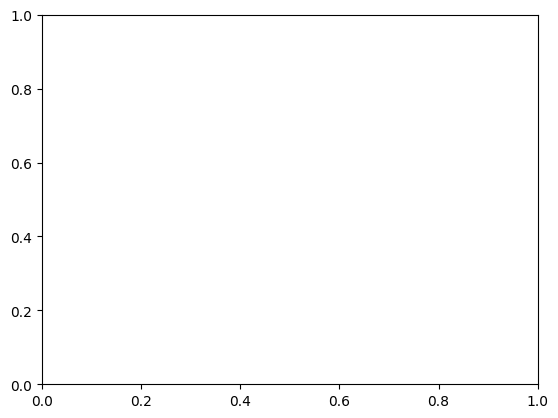

In [80]:
plt.hist(data['education'])
plt.show()

In [86]:
data.groupby(['education'])['is_promoted'].sum()

education
Bachelor's          3008
Below Secondary       67
Master's & above    1471
Name: is_promoted, dtype: int64

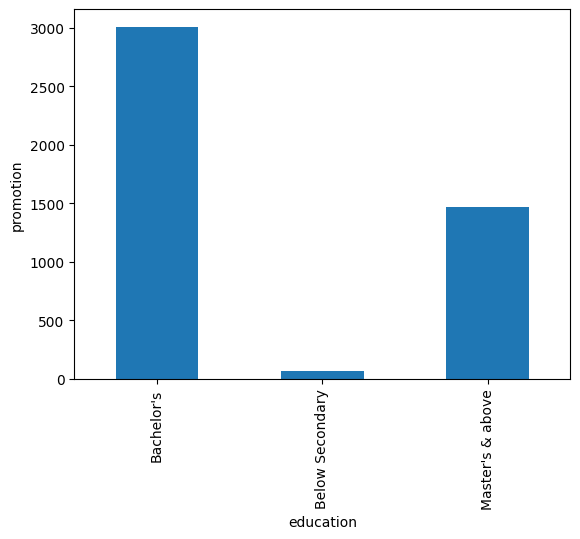

In [87]:
data.groupby(['education'])['is_promoted'].sum().plot(kind='bar')
plt.xlabel('education')
plt.ylabel('promotion')
plt.show()

In [88]:
num=data.groupby(['education'])['is_promoted'].sum().reset_index()
denom=data.groupby(['education'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
num

,education,is_promoted_sum
0,Bachelor's,3008
1,Below Secondary,67
2,Master's & above,1471


In [89]:
denom

,education,is_promoted_count
0,Bachelor's,36669
1,Below Secondary,805
2,Master's & above,14925


In [90]:
merge_df=pd.merge(left=num,right=denom,left_on='education',right_on='education',how='inner')

In [91]:
merge_df

,education,is_promoted_sum,is_promoted_count
0,Bachelor's,3008,36669
1,Below Secondary,67,805
2,Master's & above,1471,14925


In [92]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,education,is_promoted_sum,is_promoted_count,promotion_rate
0,Bachelor's,3008,36669,8.203114
1,Below Secondary,67,805,8.322981
2,Master's & above,1471,14925,9.855946


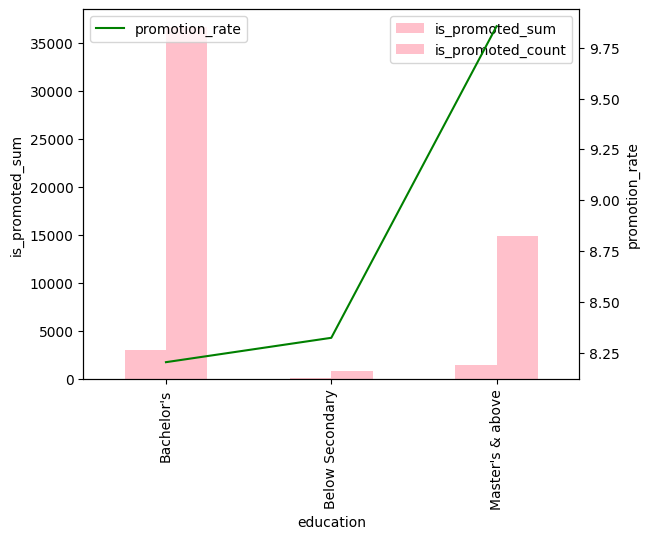

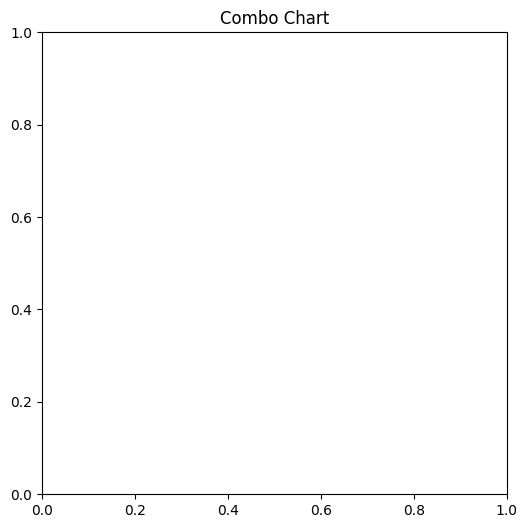

In [93]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='education', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('education')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='education', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION=6.  PROMOTION RATE HAS INCREASED WITH HIGHER EDUCATION. Master's & above education have the highest promotion rate i.e 9.8%**					*



                                                       **ON THE BASIS OF gender**
                                                       

In [94]:
data['gender']

0        f
1        m
2        m
3        m
4        m
        ..
54803    m
54804    f
54805    m
54806    m
54807    m
Name: gender, Length: 54808, dtype: object

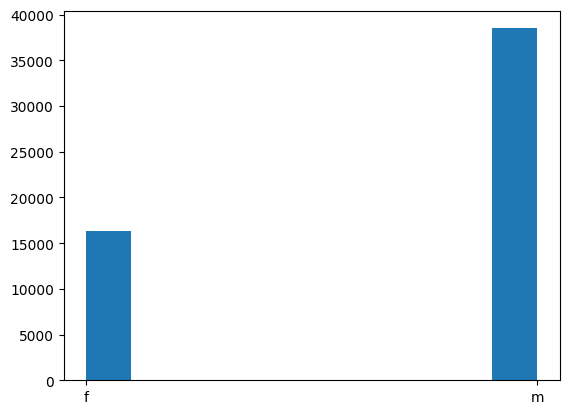

In [95]:
plt.hist(data['gender'])
plt.show()

In [96]:
data.groupby(['gender'])['is_promoted'].sum()

gender
f    1467
m    3201
Name: is_promoted, dtype: int64

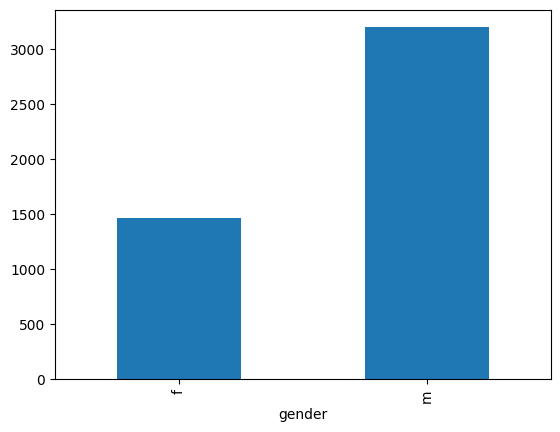

In [97]:
data.groupby(['gender'])['is_promoted'].sum().plot(kind='bar')
plt.show()

In [98]:
num=data.groupby(['gender'])['is_promoted'].sum().reset_index()
denom=data.groupby(['gender'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
num

,gender,is_promoted_sum
0,f,1467
1,m,3201


In [99]:
denom

,gender,is_promoted_count
0,f,16312
1,m,38496


In [100]:
merge_df= pd.merge(left=num,right=denom,left_on='gender',right_on='gender',how='inner')
merge_df

,gender,is_promoted_sum,is_promoted_count
0,f,1467,16312
1,m,3201,38496


In [101]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,gender,is_promoted_sum,is_promoted_count,promotion_rate
0,f,1467,16312,8.993379
1,m,3201,38496,8.315150


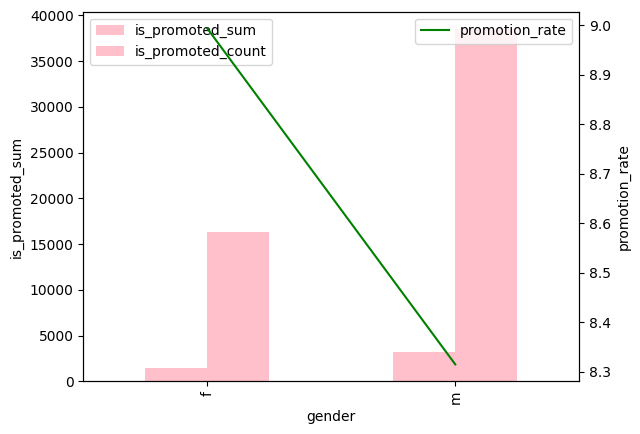

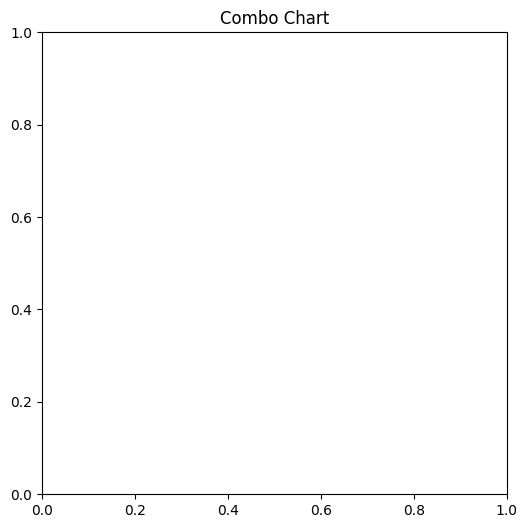

In [102]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='gender', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('gender')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='gender', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()


 **CONCLUSION= female has the higher promotion rate as compared to males by 8.9%**


                          **ON THE BASIS OF recruitment_channel**

In [137]:
data['recruitment_channel']

0        sourcing
1           other
2        sourcing
3           other
4           other
           ...   
54803    sourcing
54804       other
54805       other
54806    sourcing
54807       other
Name: recruitment_channel, Length: 54808, dtype: object

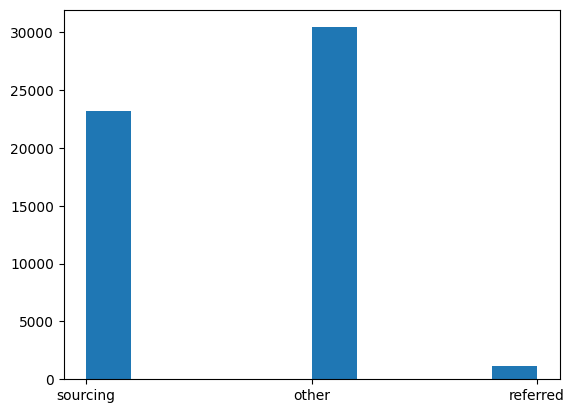

In [138]:
plt.hist(data['recruitment_channel'])
plt.show()

In [139]:
num= data.groupby(['recruitment_channel'])['is_promoted'].sum().reset_index()
denom=data.groupby(['recruitment_channel'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df=pd.merge(left=num,right=denom,left_on='recruitment_channel',right_on='recruitment_channel',how='inner')
merge_df

,recruitment_channel,is_promoted_sum,is_promoted_count
0,other,2556,30446
1,referred,138,1142
2,sourcing,1974,23220


In [140]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,recruitment_channel,is_promoted_sum,is_promoted_count,promotion_rate
0,other,2556,30446,8.395191
1,referred,138,1142,12.084063
2,sourcing,1974,23220,8.501292


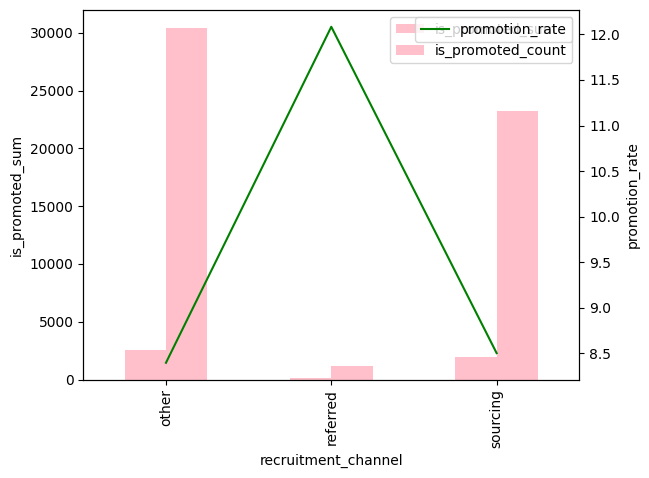

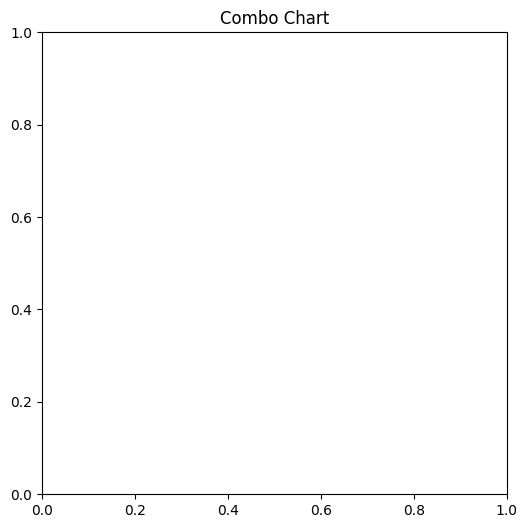

In [141]:

fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='recruitment_channel', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('recruitment_channel')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='recruitment_channel', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION= 'referred' recruitment_channel has the highest promotion rate by 12.08%**


                                            **ON THE BASIS OF no_of_trainings**
                                            

In [142]:
data['no_of_trainings']

0        1
1        1
2        1
3        2
4        1
        ..
54803    1
54804    1
54805    1
54806    1
54807    1
Name: no_of_trainings, Length: 54808, dtype: int64

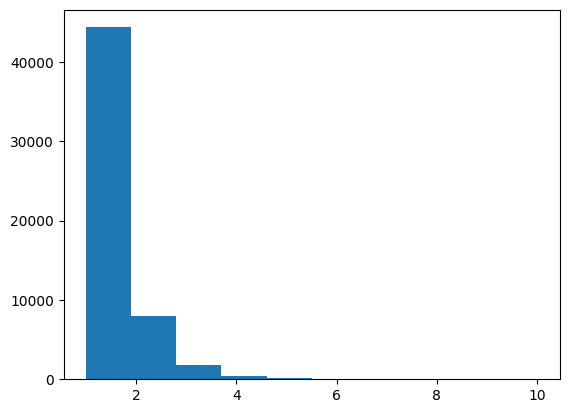

In [143]:
plt.hist(data['no_of_trainings'])
plt.show()

In [144]:
num=data.groupby(['no_of_trainings'])['is_promoted'].sum().reset_index()
denom=data.groupby(['no_of_trainings'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df=pd.merge(left=num,right=denom,left_on='no_of_trainings',right_on='no_of_trainings',how='inner')
merge_df

,no_of_trainings,is_promoted_sum,is_promoted_count
0,1,3910,44378
1,2,605,7987
2,3,122,1776
3,4,26,468
4,5,3,128
5,6,2,44
6,7,0,12
7,8,0,5
8,9,0,5
9,10,0,5


In [145]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,no_of_trainings,is_promoted_sum,is_promoted_count,promotion_rate
0,1,3910,44378,8.810672
1,2,605,7987,7.574809
2,3,122,1776,6.869369
3,4,26,468,5.555556
4,5,3,128,2.343750
5,6,2,44,4.545455
6,7,0,12,0.000000
7,8,0,5,0.000000
8,9,0,5,0.000000
9,10,0,5,0.000000


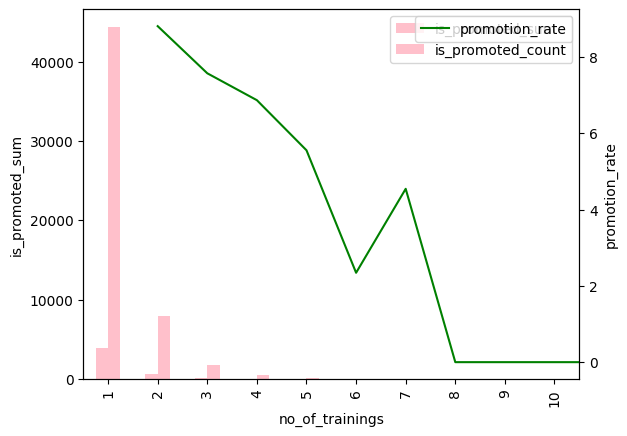

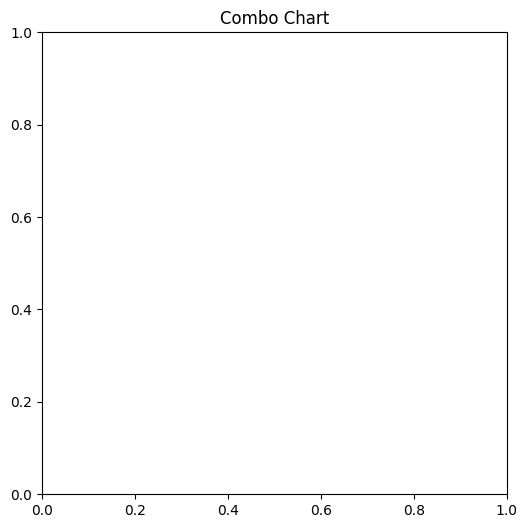

In [146]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='no_of_trainings', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('no_of_trainings')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='no_of_trainings', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION= people underwent upskill trainings has lower promotion rate than the ones who did'nt undergo. people with 1 training has the highest promotion rate  i.e 8%..**


                                              **ON THE BASIS OF AGE**
                                              

In [147]:
data['age']

0        35
1        30
2        34
3        39
4        45
         ..
54803    48
54804    37
54805    27
54806    29
54807    27
Name: age, Length: 54808, dtype: int64

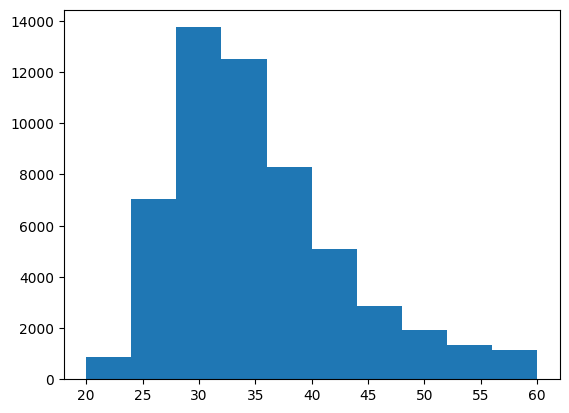

In [148]:
plt.hist(data['age'])
plt.show()

In [149]:
data['age_group']=pd.qcut(data['age'],q=5)

In [150]:
data['age_group']

0          (32.0, 35.0]
1          (28.0, 32.0]
2          (32.0, 35.0]
3          (35.0, 40.0]
4          (40.0, 60.0]
              ...      
54803      (40.0, 60.0]
54804      (35.0, 40.0]
54805    (19.999, 28.0]
54806      (28.0, 32.0]
54807    (19.999, 28.0]
Name: age_group, Length: 54808, dtype: category
Categories (5, interval[float64, right]): [(19.999, 28.0] < (28.0, 32.0] < (32.0, 35.0] < (35.0, 40.0] < (40.0, 60.0]]

In [151]:
num=data.groupby(['age_group'])['is_promoted'].sum().reset_index()
denom=data.groupby(['age_group'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df= pd.merge(left=num,right=denom,left_on='age_group',right_on='age_group',how='inner')
merge_df

C:\Users\gauta\AppData\Local\Temp\ipykernel_9316\586481392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num=data.groupby(['age_group'])['is_promoted'].sum().reset_index()
C:\Users\gauta\AppData\Local\Temp\ipykernel_9316\586481392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  denom=data.groupby(['age_group'])['is_promoted'].count().reset_index()


,age_group,is_promoted_sum,is_promoted_count
0,"(19.999, 28.0]",932,11048
1,"(28.0, 32.0]",1225,14138
2,"(32.0, 35.0]",888,8997
3,"(35.0, 40.0]",864,9963
4,"(40.0, 60.0]",759,10662


In [152]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count'].sort_values()


In [153]:
merge_df

,age_group,is_promoted_sum,is_promoted_count,promotion_rate
0,"(19.999, 28.0]",932,11048,8.435916
1,"(28.0, 32.0]",1225,14138,8.664592
2,"(32.0, 35.0]",888,8997,9.869957
3,"(35.0, 40.0]",864,9963,8.672087
4,"(40.0, 60.0]",759,10662,7.118739


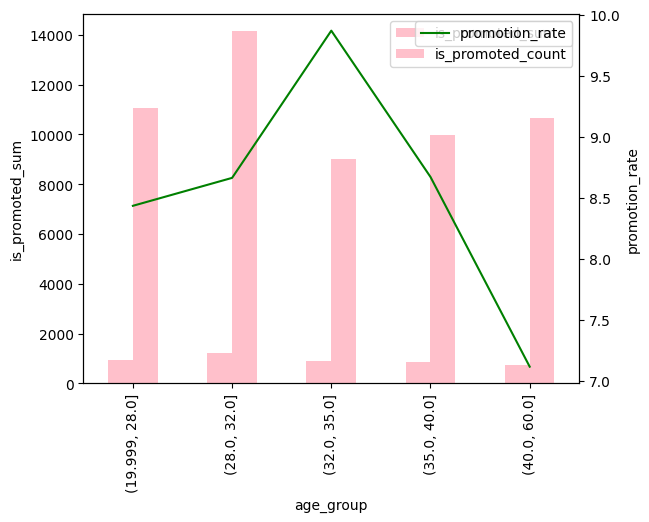

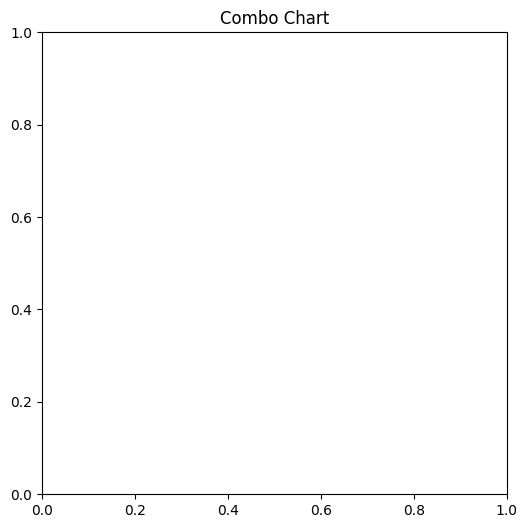

In [154]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='age_group', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('age_group')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='age_group', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

 **CONCLUSION=2.  people with age group (32.0, 35.0] has highest rate of promotion i.e 9.8% and (40.0, 60.0] has the lowest promotion rate i.e.7.11%**																								)**


                                  **ON THE BASIS OF previous_year_rating**
                             

In [162]:
data['previous_year_rating']

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

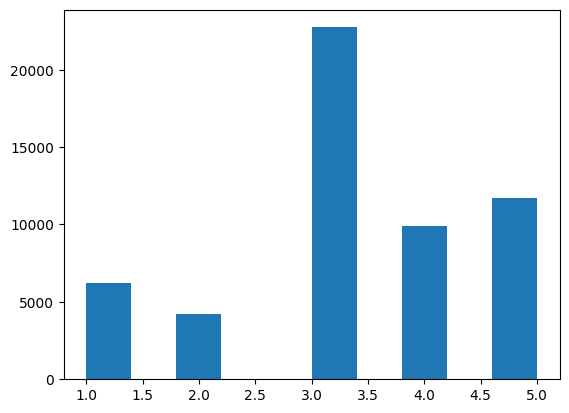

In [163]:
plt.hist(data['previous_year_rating'])
plt.show()

In [164]:
num=data.groupby(['previous_year_rating'])['is_promoted'].sum().reset_index()
denom=data.groupby(['previous_year_rating'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df=pd.merge(left=num,right=denom,left_on='previous_year_rating',right_on='previous_year_rating',how='inner')
merge_df

,previous_year_rating,is_promoted_sum,is_promoted_count
0,1.0,88,6223
1,2.0,181,4225
2,3.0,1694,22742
3,4.0,784,9877
4,5.0,1921,11741


In [165]:
merge_df['promotion _rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df



,previous_year_rating,is_promoted_sum,is_promoted_count,promotion _rate
0,1.0,88,6223,1.414109
1,2.0,181,4225,4.284024
2,3.0,1694,22742,7.448773
3,4.0,784,9877,7.937633
4,5.0,1921,11741,16.361468


KeyError: 'previous_year_rating'

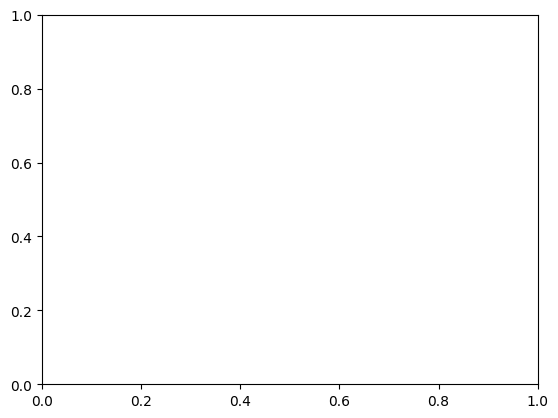

<Figure size 600x600 with 0 Axes>

In [195]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='previous_year_rating', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('previous_year_rating')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='previous_year_rating', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION= 5 RATING OF PREVIOUS_YEAR_GOT THE HIGHEST PROMOTION RATE i.e 16.35. and lowest rating got the least promotion i.e 1% and 3 and 4 rating has the same promotion rate.**																								*


                                          **ON THE BASIS OF length_of_service**
                                          

In [169]:
data['length_of_service']

0         8
1         4
2         7
3        10
4         2
         ..
54803    17
54804     6
54805     3
54806     2
54807     5
Name: length_of_service, Length: 54808, dtype: int64

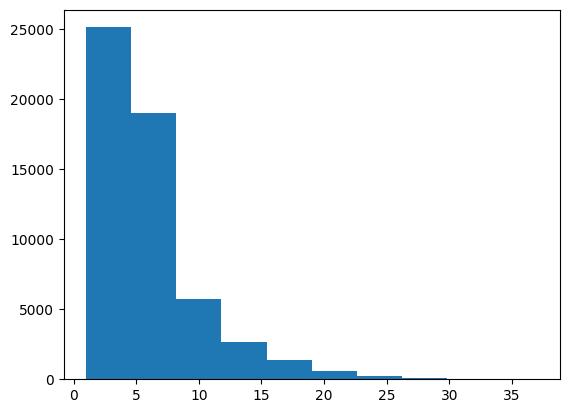

In [170]:
plt.hist(data['length_of_service'])
plt.show()

In [171]:
num= data.groupby(['length_of_service'])['is_promoted'].sum().reset_index()
denom= data.groupby(['length_of_service'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df= pd.merge(left=num,right=denom,left_on='length_of_service',right_on='length_of_service',how='inner')
merge_df


,length_of_service,is_promoted_sum,is_promoted_count
0,1,377,4547
1,2,595,6684
2,3,609,7033
3,4,598,6836
4,5,475,5832
5,6,401,4734
6,7,464,5551
7,8,269,2883
8,9,229,2629
9,10,204,2193


In [172]:
data['length_of_service_group']=pd.qcut(data['length_of_service'],q=10,duplicates="drop")

                                        

In [173]:
data['length_of_service_group']

0          (7.0, 8.0]
1          (3.0, 4.0]
2          (6.0, 7.0]
3         (8.0, 11.0]
4        (0.999, 2.0]
             ...     
54803    (11.0, 37.0]
54804      (5.0, 6.0]
54805      (2.0, 3.0]
54806    (0.999, 2.0]
54807      (4.0, 5.0]
Name: length_of_service_group, Length: 54808, dtype: category
Categories (9, interval[float64, right]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] ... (6.0, 7.0] < (7.0, 8.0] < (8.0, 11.0] < (11.0, 37.0]]

In [174]:
num= data.groupby(['length_of_service_group'])['is_promoted'].sum().reset_index()
denom= data.groupby(['length_of_service_group'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df= pd.merge(left=num,right=denom,left_on='length_of_service_group',right_on='length_of_service_group',how='inner')
merge_df

C:\Users\gauta\AppData\Local\Temp\ipykernel_9316\1858110989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num= data.groupby(['length_of_service_group'])['is_promoted'].sum().reset_index()
C:\Users\gauta\AppData\Local\Temp\ipykernel_9316\1858110989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  denom= data.groupby(['length_of_service_group'])['is_promoted'].count().reset_index()


,length_of_service_group,is_promoted_sum,is_promoted_count
0,"(0.999, 2.0]",972,11231
1,"(2.0, 3.0]",609,7033
2,"(3.0, 4.0]",598,6836
3,"(4.0, 5.0]",475,5832
4,"(5.0, 6.0]",401,4734
5,"(6.0, 7.0]",464,5551
6,"(7.0, 8.0]",269,2883
7,"(8.0, 11.0]",529,5738
8,"(11.0, 37.0]",351,4970


In [175]:
merge_df['promotion_rate']= 100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,length_of_service_group,is_promoted_sum,is_promoted_count,promotion_rate
0,"(0.999, 2.0]",972,11231,8.654617
1,"(2.0, 3.0]",609,7033,8.659178
2,"(3.0, 4.0]",598,6836,8.747806
3,"(4.0, 5.0]",475,5832,8.144719
4,"(5.0, 6.0]",401,4734,8.470638
5,"(6.0, 7.0]",464,5551,8.358854
6,"(7.0, 8.0]",269,2883,9.330558
7,"(8.0, 11.0]",529,5738,9.219240
8,"(11.0, 37.0]",351,4970,7.062374


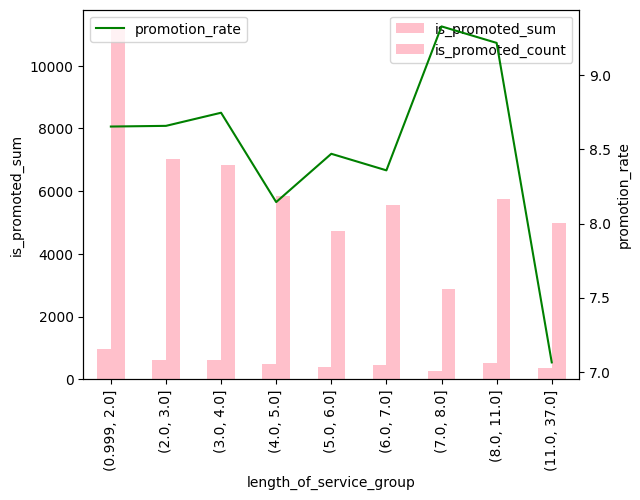

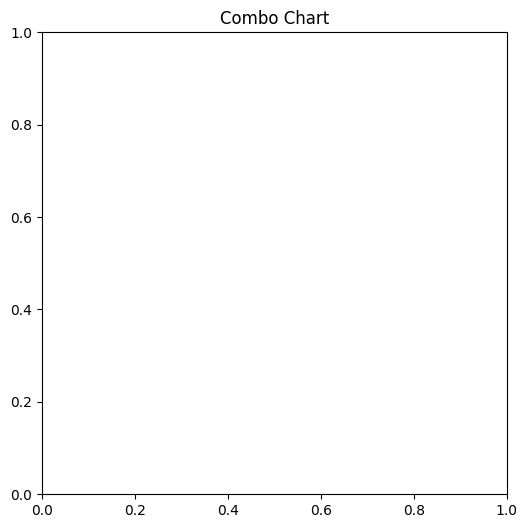

In [176]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='length_of_service_group', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('length_of_service_group')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='length_of_service_group', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION=  length_of_service_group(7.0, 10.0] years has the highest promotion rate i.e 9.11%.**																							*


                                      **ON THE BASIS OF KPIs_met >80%**
  **percentage of Key Performance Indicators (KPIs) that have been achieved or met successfully, with the target being set at over 80%**                             

In [177]:
data['KPIs_met >80%']

0        1
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    1
54806    0
54807    0
Name: KPIs_met >80%, Length: 54808, dtype: int64

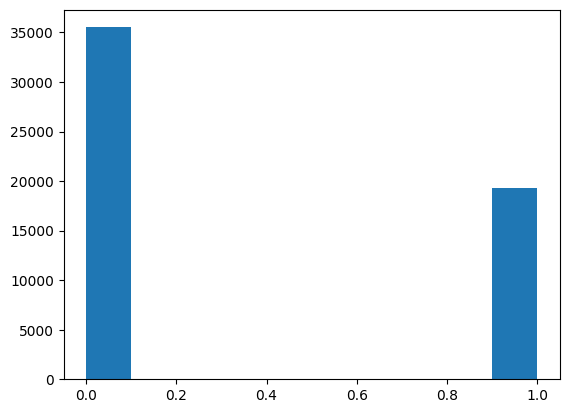

In [178]:
plt.hist(data['KPIs_met >80%'])
plt.show()

In [179]:
num=data.groupby(['KPIs_met >80%'])['is_promoted'].sum().reset_index()
denom=data.groupby(['KPIs_met >80%'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df= pd.merge(left=num,right=denom,left_on='KPIs_met >80%',right_on='KPIs_met >80%',how='inner')
merge_df

,KPIs_met >80%,is_promoted_sum,is_promoted_count
0,0,1406,35517
1,1,3262,19291


In [180]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df


,KPIs_met >80%,is_promoted_sum,is_promoted_count,promotion_rate
0,0,1406,35517,3.958668
1,1,3262,19291,16.909440


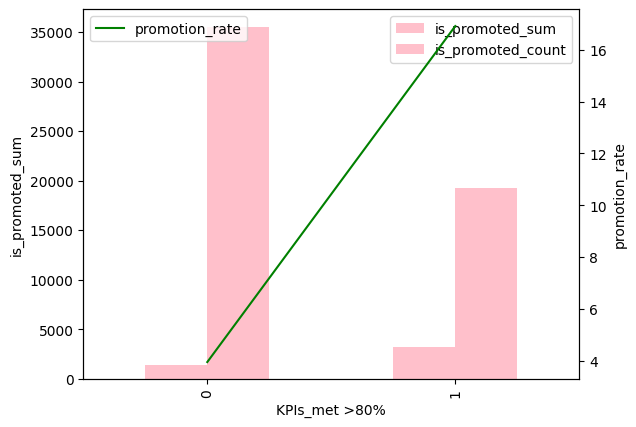

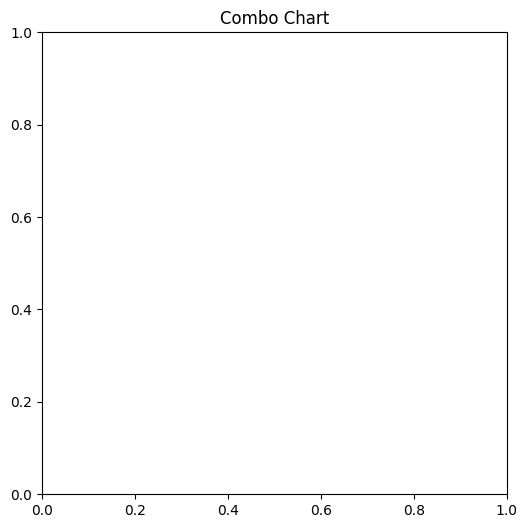

In [181]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='KPIs_met >80%', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('KPIs_met >80%')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='KPIs_met >80%', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION=promotion rate is greater for people with KPIs_met >80% as compared to not meeting KPIs >80%**


                                            **ON THE BASIS OF awards_won?**


In [182]:
data['awards_won?']

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: awards_won?, Length: 54808, dtype: int64

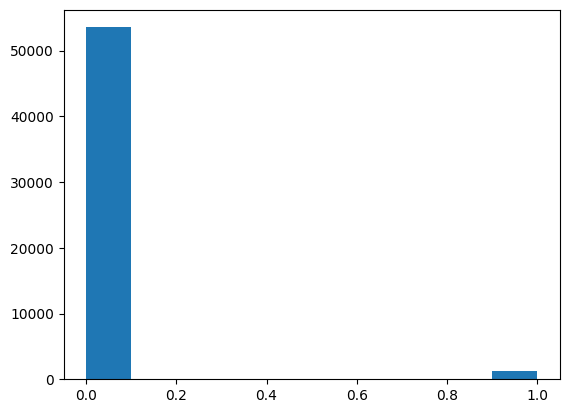

In [183]:
plt.hist(data['awards_won?'])
plt.show()

In [184]:
num=data.groupby(['awards_won?'])['is_promoted'].sum().reset_index()
denom=data.groupby(['awards_won?'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df= pd.merge(left=num,right=denom,left_on='awards_won?',right_on='awards_won?',how='inner')
merge_df

,awards_won?,is_promoted_sum,is_promoted_count
0,0,4109,53538
1,1,559,1270


In [185]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,awards_won?,is_promoted_sum,is_promoted_count,promotion_rate
0,0,4109,53538,7.674922
1,1,559,1270,44.015748


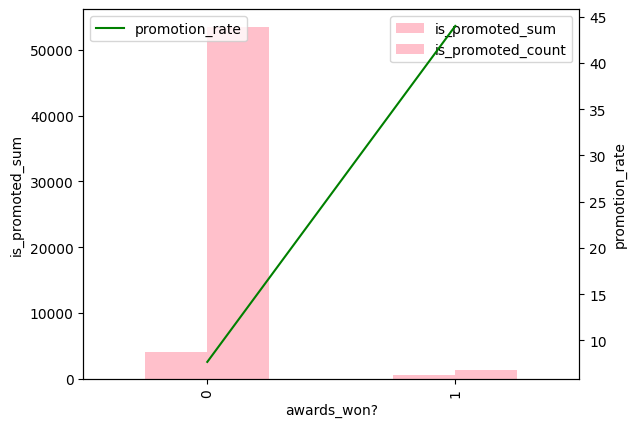

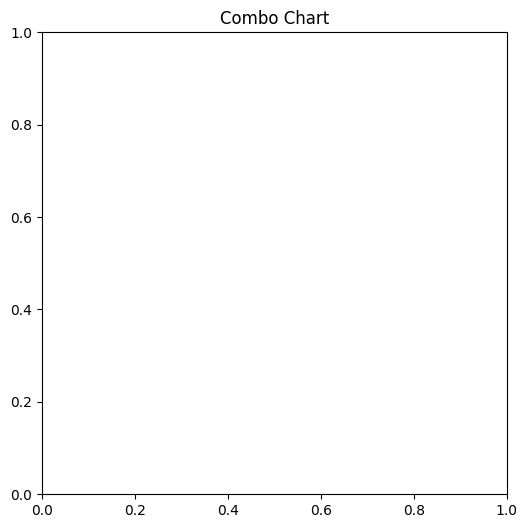

In [186]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='awards_won?', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('awards_won?')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='awards_won?', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION= Promotion rate is highest for the awards winning people by 44.0%**


                                      **ON THE BASIS OF avg_training_score**
                      

In [187]:
data['avg_training_score']

0        49
1        60
2        50
3        50
4        73
         ..
54803    78
54804    56
54805    79
54806    45
54807    49
Name: avg_training_score, Length: 54808, dtype: int64

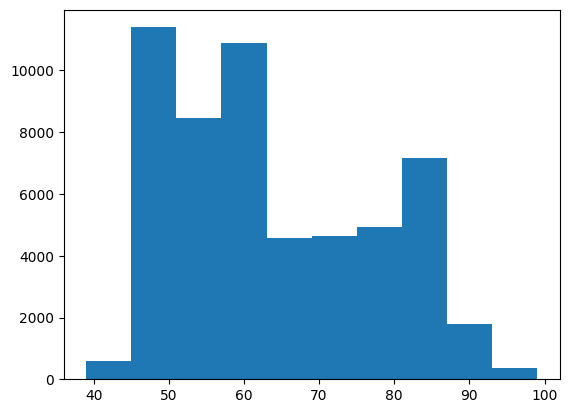

In [188]:
plt.hist(data['avg_training_score'])
plt.show()

In [189]:
data['avg_training_score_group']=pd.qcut(data['avg_training_score'],q=10)

In [190]:
num=data.groupby(['avg_training_score_group'])['is_promoted'].sum().reset_index()
denom=data.groupby(['avg_training_score_group'])['is_promoted'].count().reset_index()
denom.rename(columns={'is_promoted':'is_promoted_count'},inplace=True)
num.rename(columns={'is_promoted':'is_promoted_sum'},inplace=True)
merge_df= pd.merge(left=num,right=denom,left_on='avg_training_score_group',right_on='avg_training_score_group',how='inner')
merge_df

C:\Users\gauta\AppData\Local\Temp\ipykernel_9316\2374630203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num=data.groupby(['avg_training_score_group'])['is_promoted'].sum().reset_index()
C:\Users\gauta\AppData\Local\Temp\ipykernel_9316\2374630203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  denom=data.groupby(['avg_training_score_group'])['is_promoted'].count().reset_index()


,avg_training_score_group,is_promoted_sum,is_promoted_count
0,"(38.999, 48.0]",262,6606
1,"(48.0, 50.0]",212,5397
2,"(50.0, 53.0]",219,5527
3,"(53.0, 58.0]",377,6274
4,"(58.0, 60.0]",283,4219
5,"(60.0, 64.0]",438,5058
6,"(64.0, 71.0]",596,5813
7,"(71.0, 79.0]",552,5390
8,"(79.0, 83.0]",547,5208
9,"(83.0, 99.0]",1182,5316


In [191]:
merge_df['promotion_rate']=100*merge_df['is_promoted_sum']/merge_df['is_promoted_count']
merge_df

,avg_training_score_group,is_promoted_sum,is_promoted_count,promotion_rate
0,"(38.999, 48.0]",262,6606,3.966091
1,"(48.0, 50.0]",212,5397,3.928108
2,"(50.0, 53.0]",219,5527,3.962367
3,"(53.0, 58.0]",377,6274,6.008926
4,"(58.0, 60.0]",283,4219,6.707751
5,"(60.0, 64.0]",438,5058,8.659549
6,"(64.0, 71.0]",596,5813,10.252881
7,"(71.0, 79.0]",552,5390,10.241187
8,"(79.0, 83.0]",547,5208,10.503072
9,"(83.0, 99.0]",1182,5316,22.234763


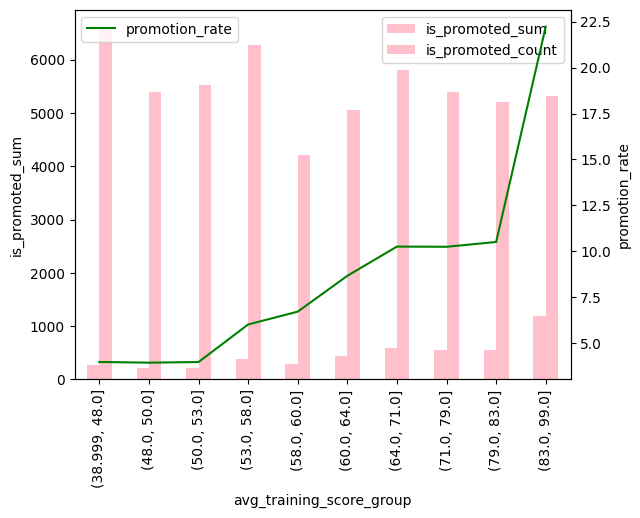

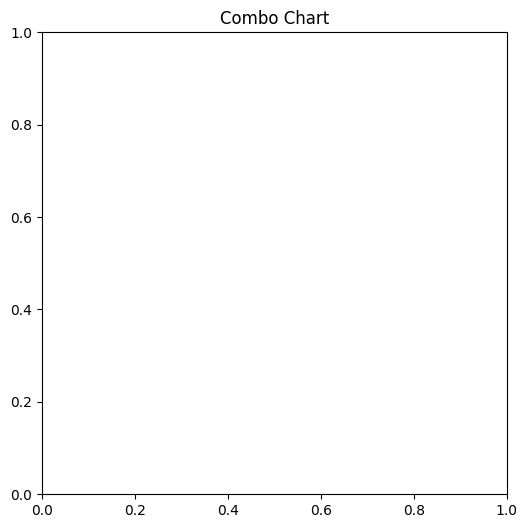

In [192]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(6,6))


merge_df.plot(x='avg_training_score_group', y=['is_promoted_sum','is_promoted_count'], kind='bar', ax=ax1, color='Pink')
ax1.set_xlabel('avg_training_score_group')
ax1.set_ylabel('is_promoted_sum')

ax2 = ax1.twinx()
merge_df.plot(x='avg_training_score_group', y='promotion_rate', kind='line', ax=ax2, color='Green')
ax2.set_ylabel('promotion_rate')

plt.title('Combo Chart')

plt.show()

**CONCLUSION= PROMOTION RATE HAS INCREASED WITH INCREASING TRAINING SCORE.
(83.0, 99.0]avg_training_score_group HAS THE HIGHEST PROMOTION RATE.**